Promolecule tools
==================

### Promolecular properties

Extensive 
$$
\rho^{mol}_{pro} = \sum^{N_{atoms}}_{i=1} c_i \rho^{atom}_i
$$
and intensive properties
$$
\langle x \rangle_p =  \left(\frac{1}{n}\sum_{k=1}^n x_k^p \right)^{\tfrac{1}{p}}
$$

### Compute promolecular properties (simple example)

In [1]:
import sys  
sys.path.insert(0, '../../')

In [2]:
# Import modules
from atomdb.promolecule import make_promolecule

# Optional modules
import numpy as np
from matplotlib import pyplot

In [3]:
# Define molecule
atoms = ['Cl', 'Cl']
coords = np.array([[-1.5, 0., 0.], [1.5, 0., 0.]]) #in Bohr
charges = [0, 0]
mults = [2, 2]

In [4]:
# Make promolecule instance
promol = make_promolecule(atoms, coords, charges=charges, mults=mults, units="bohr", dataset='slater')

### Extensive

In [5]:
# Extensive (global)
print('Electronic Energy (a.u.)', promol.energy())

Electronic Energy (a.u.) 918.964144616


In [6]:
# Make grid
N = 2000
rad_grid = np.linspace(-3., 3., num=N)
grid = np.zeros((N, 3))
grid[:,0] = rad_grid

#  Extensive (local)
promol_dens = promol.density(grid, spin='ab', log=True)
promol_dens = promol.ked(grid, spin='ab', log=False)


In [9]:
promol_grad = promol.gradient(grid, spin='ab', log=False)
promol_lapl = promol.laplacian(grid, spin='ab', log=False)
promol_hess = promol.hessian(grid, spin='ab', log=False)

Text(0.5, 1.0, 'Cl--Cl, dataset slater')

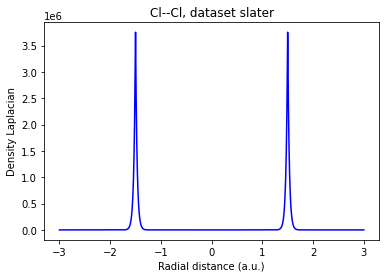

In [12]:
dataset = 'slater'
fig, ax = pyplot.subplots()
ax.plot(rad_grid, promol_lapl, color="blue")
ax.set_xlabel("Radial distance (a.u.)")
ax.set_ylabel("Density Laplacian")
ax.set_title(f'{atoms[0]}--{atoms[1]}, dataset {dataset}')

### Intensive

In [ ]:
print('Promolecule IP (eV)', promol.ip(p=1))